# 擬似ヒートマップを生成する関数の定義

In [3]:
def generate_dummy_heatmap(heatmap_voxel_zeros, num_points=20, gaussian_sigma=20, heatmap_cmap="jet"):
    """
    ダミーヒートマップを生成する関数

    Parameters:
    - heatmap_voxel_zeros: ndarray, ヒートマップの基礎となるボクセルデータ
    - num_points: int, 乱数で設定する注目点の数
    - gaussian_sigma: int, ガウスフィルタのシグマ値
    - heatmap_cmap: str, カラーマップの名前

    Returns:
    - rgb_value: ndarray, カラーマップで着色されたヒートマップ
    """

    # num_points個の注目点を乱数で設定
    points = np.random.randint(0, 128, (num_points, 3))

    # 注目点の周囲にガウスフィルタでヒートマップを作成
    for point in points:
        heatmap_voxel_zeros[point[0], point[1], point[2], 0] = np.random.randint(1, 256)

    heatmap = gaussian_filter(heatmap_voxel_zeros[:, :, :, 0], sigma=gaussian_sigma)

    # 0-1の範囲に正規化
    heatmap_normalized = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min())

    # ヒートマップの強度をheatmap_cmapカラーマップで表示
    jet_cmap = matplotlib.colormaps[heatmap_cmap]
    rgb_value = jet_cmap(heatmap_normalized)

    return rgb_value

# 擬似視線ヒートマップ描画

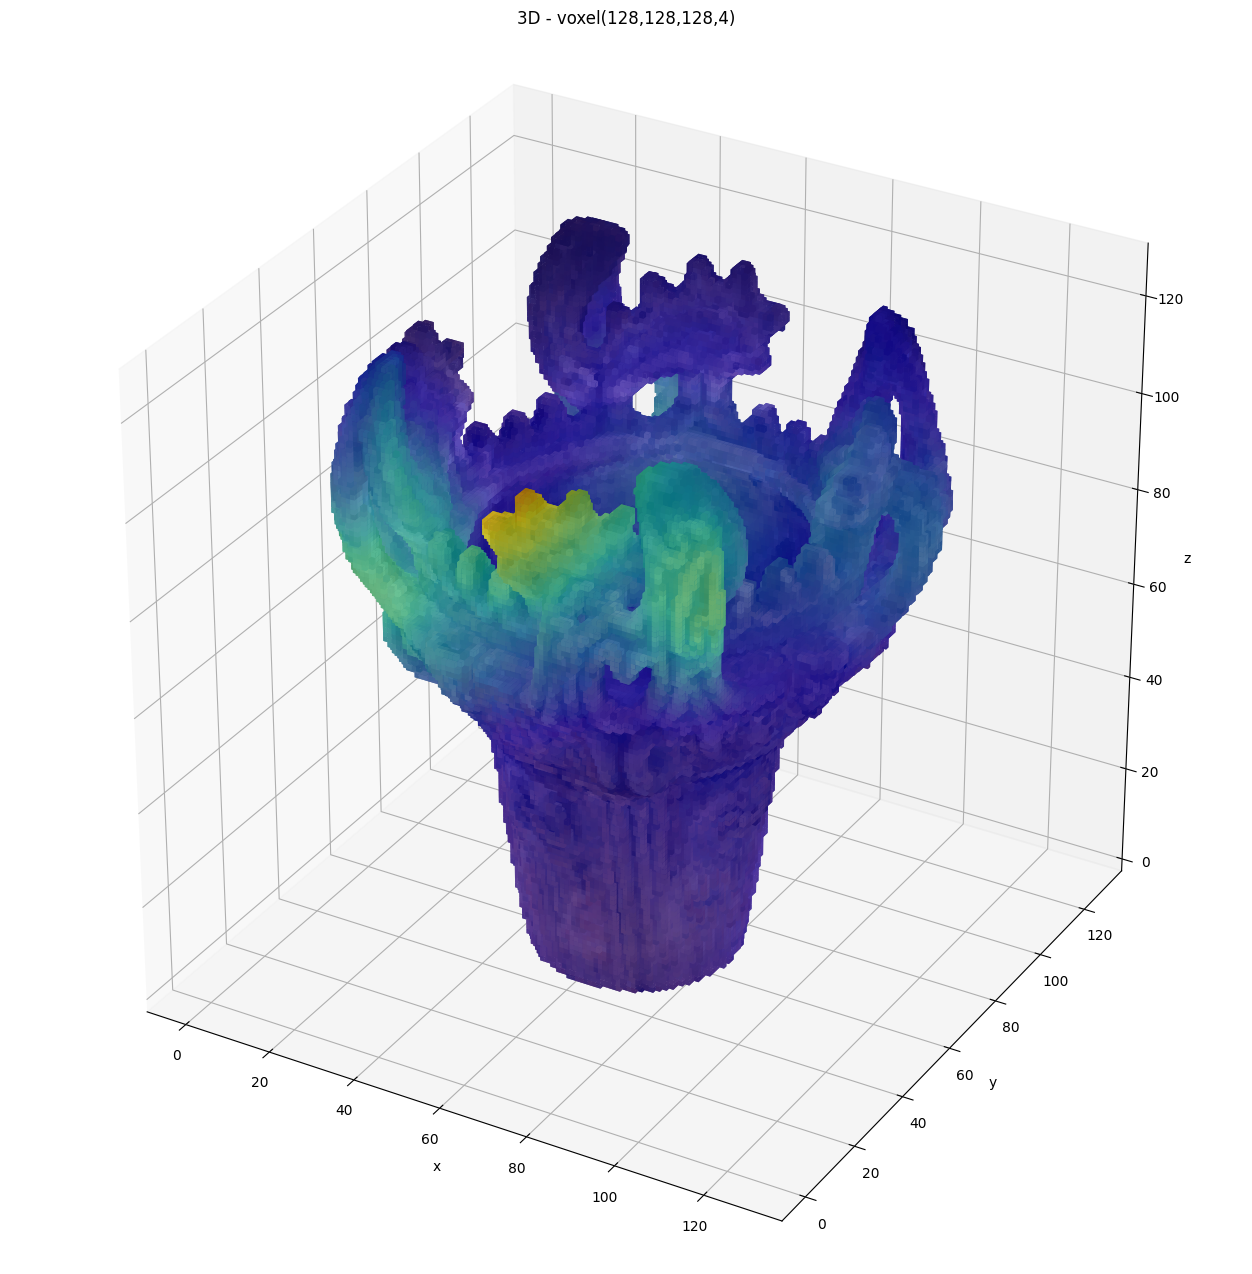

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# 乱数生成器のseed値を固定
# いつ実行しても同じヒートマップ（乱数）を生成するための設定
np.random.seed(42)

# 縄文土器のVoxelデータ(128, 128, 128, 4)のnumpy array形式を読み込む
jomon_name = "okinohara_003"
jomon_voxel_data = np.load(f"/content/data/voxel/{jomon_name}_128_000.npy")

N_Xaxis, N_Yaxis, N_Zaxis, N_color_channel = jomon_voxel_data.shape

# 出力ヒートマップ画像のファイル名指定
pngname = f"{jomon_name}_{N_Xaxis}-{N_Yaxis}-{N_Zaxis}_dummy_heatmap.png"

# ヒートマップの基礎となるボクセルデータを定義（0埋め状態）
heatmap_voxel_zeros = np.zeros((N_Xaxis, N_Yaxis, N_Zaxis, 1), dtype=np.float32)

# #ダミーヒートマップを生成する関数
rgb_value = generate_dummy_heatmap(
    heatmap_voxel_zeros, num_points=20, gaussian_sigma=20, heatmap_cmap="jet"
)

# 縄文土器のVoxelデータとヒートマップデータを重ね合わせる
facecolors = jomon_voxel_data / 255
facecolors[:, :, :, :3] = facecolors[:, :, :, :3] * 0.5 + rgb_value[:, :, :, :3] * 0.5

filled = facecolors[:, :, :, -1] != 0
x, y, z = np.indices(tuple(np.array(filled.shape) + 1))

# Voxelの描画
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111, projection='3d', aspect='auto')

ax.voxels(x, y, z, filled, facecolors=facecolors, shade=False)

# 視点座標の設定
# elev :仰角 (度)，azim :方位角 (度)，roll :偏波角 (度)
ax.view_init(elev=30, azim=-60, roll=0)

ax.set_title(f"3D - voxel({N_Xaxis},{N_Yaxis},{N_Zaxis},{N_color_channel})")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_box_aspect((1, 1, 1))

plt.savefig(pngname)
plt.show()
plt.clf()
plt.close()

# 擬似視線ヒートマップ描画（6面）

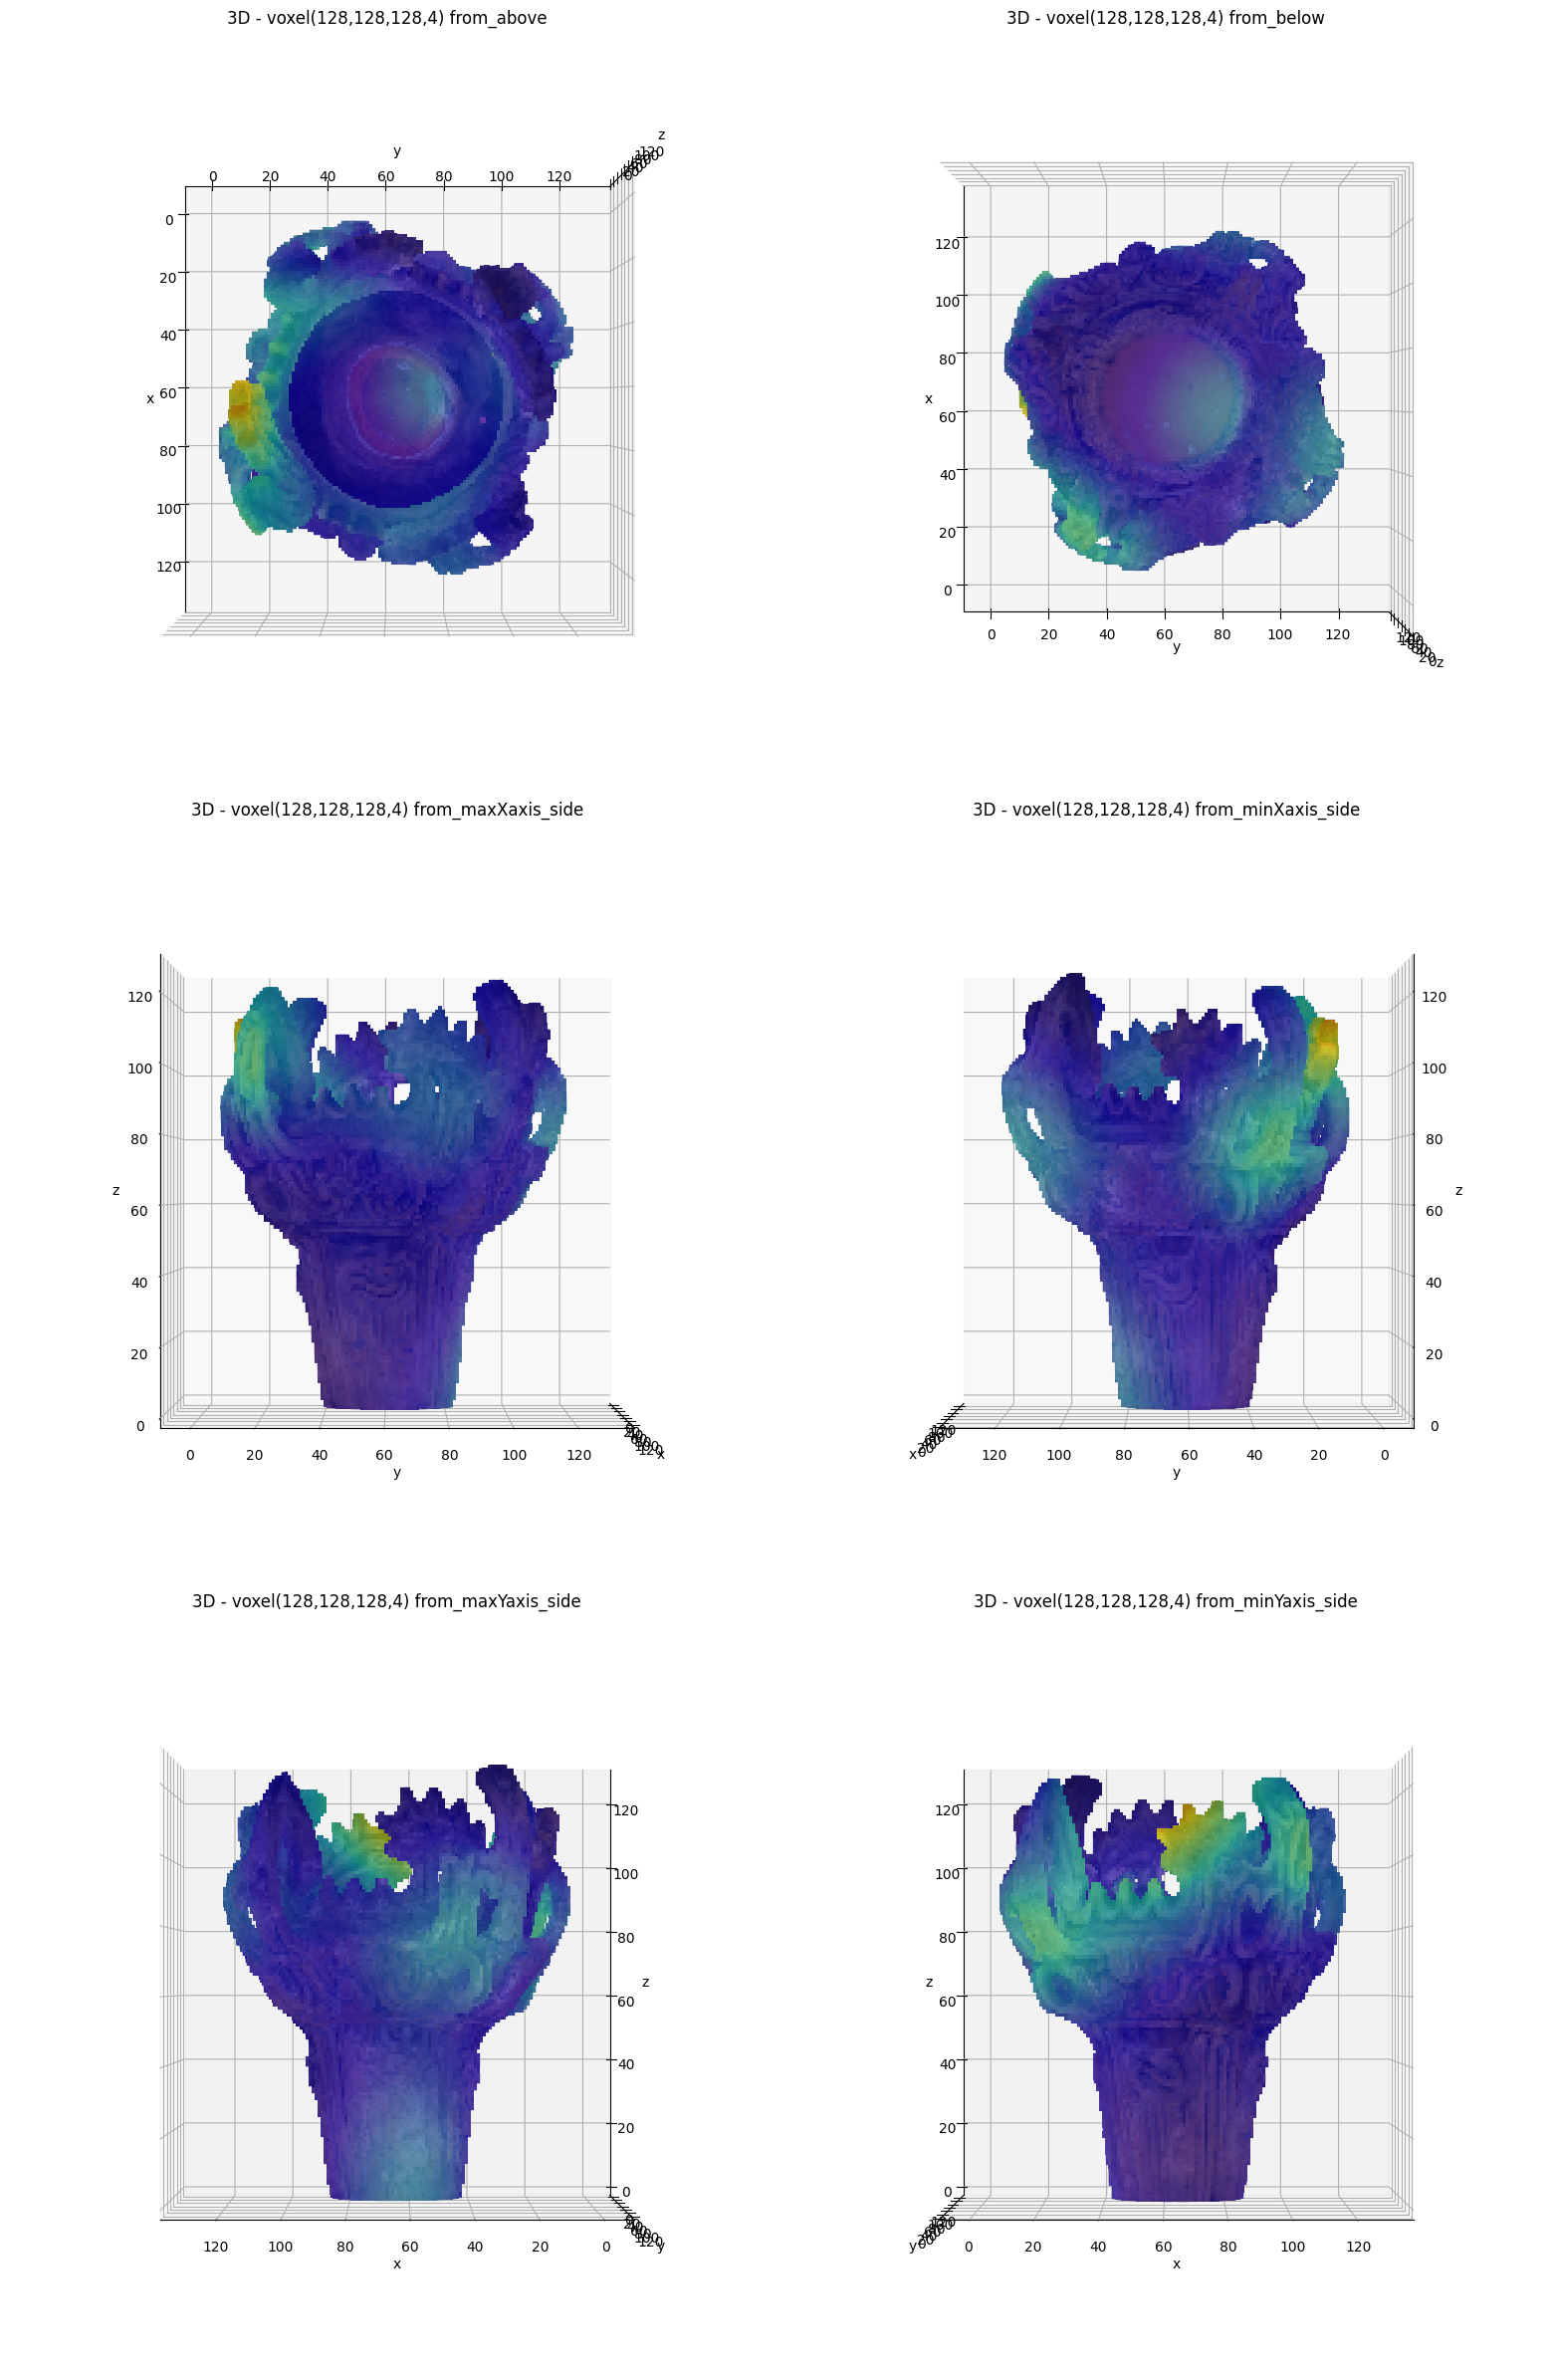

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# 乱数生成器のseed値を固定
# いつ実行しても同じヒートマップ（乱数）を生成するための設定
np.random.seed(42)

# 視点座標の設定
# elev :仰角 (度)，azim :方位角 (度)，roll :偏波角 (度)
camera_angle_dict = {
    'from_above':dict(elev=90, azim=0, roll=0),
    'from_below':dict(elev=-90, azim=0, roll=0),
    'from_maxXaxis_side':dict(elev=0, azim=0, roll=0),
    'from_minXaxis_side':dict(elev=0, azim=180, roll=0),
    'from_maxYaxis_side':dict(elev=0, azim=90, roll=0),
    'from_minYaxis_side':dict(elev=0, azim=-90, roll=0)
    }

# 縄文土器のVoxelデータ(128, 128, 128, 4)のnumpy array形式を読み込む
jomon_name = "okinohara_003"
jomon_voxel_data = np.load(f"/content/data/voxel/{jomon_name}_128_000.npy")

N_Xaxis, N_Yaxis, N_Zaxis, N_color_channel = jomon_voxel_data.shape

# 出力ヒートマップ画像のファイル名指定
pngname = f"{jomon_name}_{N_Xaxis}-{N_Yaxis}-{N_Zaxis}_dummy_heatmap_from_six_perspectives.png"

# ヒートマップの基礎となるボクセルデータを定義（0埋め状態）
heatmap_voxel_zeros = np.zeros((N_Xaxis, N_Yaxis, N_Zaxis, 1), dtype=np.float32)

# #ダミーヒートマップを生成する関数
rgb_value = generate_dummy_heatmap(
    heatmap_voxel_zeros, num_points=20, gaussian_sigma=20, heatmap_cmap="jet"
)

# 縄文土器のVoxelデータとヒートマップデータを重ね合わせる
facecolors = jomon_voxel_data / 255
facecolors[:, :, :, :3] = facecolors[:, :, :, :3] * 0.5 + rgb_value[:, :, :, :3] * 0.5

filled = facecolors[:, :, :, -1] != 0
x, y, z = np.indices(tuple(np.array(filled.shape) + 1))

# Voxelの描画
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 24), subplot_kw=dict(projection='3d', aspect='auto'))

for index, ax in enumerate(axes.flat):
    ax.voxels(x, y, z, filled, facecolors=facecolors, shade=False)

    camera_key = list(camera_angle_dict)[index]
    camera_val = list(camera_angle_dict.values())[index]

    # 視点座標の設定
    # elev :仰角 (度)，azim :方位角 (度)，roll :偏波角 (度)
    ax.view_init(elev=camera_val["elev"], azim=camera_val["azim"], roll=camera_val["roll"])

    ax.set_title(f"3D - voxel({N_Xaxis},{N_Yaxis},{N_Zaxis},{N_color_channel}) {camera_key}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.set_box_aspect((1, 1, 1))

plt.tight_layout()
plt.savefig(pngname)
plt.show()
plt.clf()
plt.close()